In [27]:
import numpy as np
import seaborn as sns        
import matplotlib.pyplot as plt                                             
import pandas as pd

In [28]:
df = pd.read_csv("gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


[Text(0.5, 1.0, 'TSNE')]

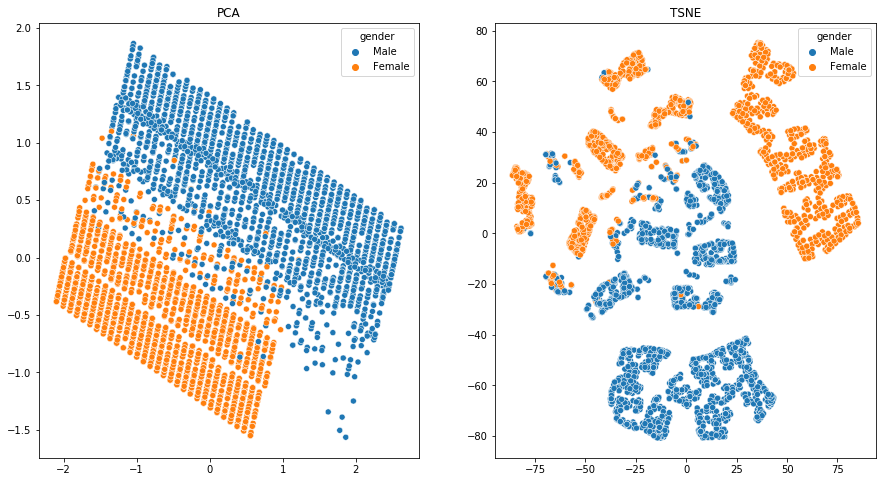

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_pca = PCA(n_components=2).fit_transform(df.drop(columns = "gender"))
df_tsne = TSNE(n_components=2, random_state=1).fit_transform(df.drop(columns = "gender"))

fig, axes = plt.subplots(1,2, figsize = (15,8))
sns.scatterplot(x = df_pca.T[0], y = df_pca.T[1], ax = axes[0], hue = df["gender"]).set(title="PCA")
sns.scatterplot(x = df_tsne.T[0], y = df_tsne.T[1], ax = axes[1], hue = df["gender"]).set(title="TSNE")

k = 2
Score: 0.41371676132892027
k = 2
Score: 0.39257368


[Text(0.5, 1.0, 'KMeans with TSNE')]

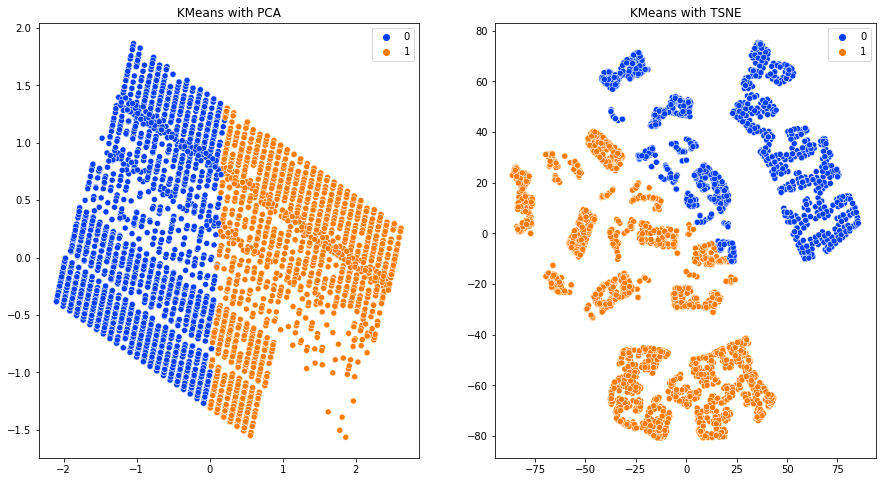

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics

km_model_pca = KMeans(n_clusters = 2).fit(df_pca)
y_pca = km_model_pca.predict(df_pca)
print("k =", 2)
print("Score:", metrics.silhouette_score(df_pca, y_pca))

km_model_tsne = KMeans(n_clusters = 2).fit(df_tsne)
y_tsne = km_model_tsne.fit_predict(df_tsne)
print("k =", 2)
print("Score:", metrics.silhouette_score(df_tsne, y_tsne))

fig, axes = plt.subplots(1,2, figsize = (15,8))
sns.scatterplot(
    x = df_pca.T[0], y = df_pca.T[1], ax = axes[0], hue = km_model_pca.labels_, palette="bright"
).set(title="KMeans with PCA")
sns.scatterplot(
    x = df_tsne.T[0], y = df_tsne.T[1], ax = axes[1], hue = km_model_tsne.labels_, palette="bright"
).set(title="KMeans with TSNE")

(237, 212, 3)


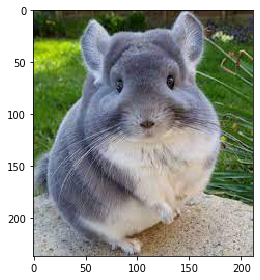

In [79]:
import matplotlib.pyplot as plt


img = plt.imread("22.jpg")
print(img.shape)

io.imshow(img)

In [80]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

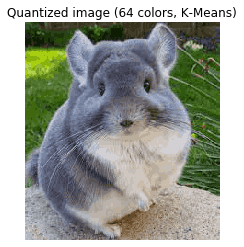

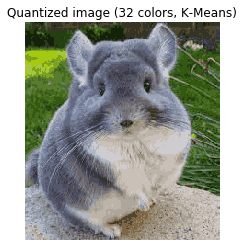

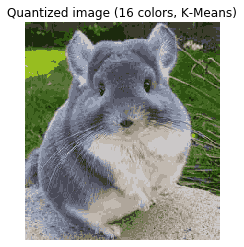

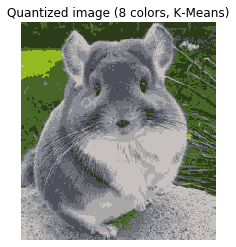

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

i = 0
img = np.array(img, dtype=np.float64) / 255
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))

for n_colors in [64,32,16,8]:
    i = i+1
    
    image_array_sample = shuffle(image_array, random_state=1)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array)

    plt.figure(i)
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))